<h1 align="center">Fase 1 - Data Analysis and Exploration</h1>

## Módulo 01 - Visualização de Dados

### Aula 1 - Tratamento, exploração e visualização de dados    	   


#### 1. Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:

* **os**: para manipulação de arquivos.
* **sys**: para manipulação de arquivos.
* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e matrizes.
* **Matplotlib**: para visualização dos dados.
* **Seaborn**: para visualização dos dados.
* ** DateTime**: para manipulação de datas.

In [76]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from datetime import date

# Limpar entradas duplicadas no PATH
sys.path = list(set(sys.path))

# Adicionando o caminho da pasta onde o arquivo visualization.py está localizado
sys.path.append('/home/naina/Projects/pos_fiap/scripts/utils')

# Agora você pode importar o arquivo corretamente
from visualization import *



#### 2. Aquisição dos dados
Esses dados foram obtidos a partir do IBGE, e estão disponíveis no site: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados . São dados referentes à estimativa populacional de 2024, e estão disponíveis em formato xlsx.

In [77]:
# Carregando o arquivo de dados
ibge = pd.read_excel('/home/naina/Projects/pos_fiap/fase_01/data/raw/estimativa_dou_2024.xls')
ibge.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2024,Unnamed: 1
0,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631


##### 2.1 Ajuste da Apresentação dos Dados

In [78]:
#Removendo a linha, 0, 34 e 35
ibge = ibge.drop([0, 34, 35])



#### 3. Análise Exploratória dos Dados

##### 3.1. Entendendo dos Dados
Para iniciar a análise, é importante entender a estrutura dos dados e as informações disponíveis.
##### **Dicionário de Dados**
Um dicionário de dados foi criado para facilitar a compreensão das informações contidas no dataset. As colunas presentes no dataset são:
* **BR_UF2004**: Brasil, Região Norte, Região Nordeste, Região Sudeste, Região Sul, Região Centro-Oeste e Unidade da Federação.
* **População**: População estimada em Julho de 2024.

In [79]:
ibge.columns = ['BR_UF2004', 'POP_ESTIMADA']
ibge

,BR_UF2004,POP_ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631
5,Amazonas,4281209
6,Roraima,716793
7,Pará,8664306
8,Amapá,802837
9,Tocantins,1577342
10,Nordeste,57112096


##### 3.2. Verificação dos Dados
Nesta etapa, foi realizada uma inspeção minuciosa do dataset para assegurar sua integridade e qualidade antes de prosseguir com a análise. A verificação dos dados inclui:

- **Exploração Inicial:** Leitura do dataset para entender a estrutura dos dados, as variáveis disponíveis e o volume de registros.
- **Validação de Consistência:** Verificação de inconsistências, como valores ausentes, duplicações e anomalias que possam impactar a análise.
- **Sumarização Estatística:** Geração de estatísticas descritivas das variáveis para obter uma visão geral das distribuições e identificar possíveis outliers.

In [80]:
ibge.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BR_UF2004     33 non-null     object
 1   POP_ESTIMADA  33 non-null     object
dtypes: object(2)
memory usage: 792.0+ bytes


In [81]:
# Verificando se tem valores duplicados
ibge.duplicated().sum()

np.int64(0)

In [82]:
#convertendo a coluna POP_ESTIMADA para int e garantindo que a coluna BR_UF2004 seja string
ibge['POP_ESTIMADA'] = ibge['POP_ESTIMADA'].astype(int)
ibge['BR_UF2004'] = ibge['BR_UF2004'].astype(str)
ibge

,BR_UF2004,POP_ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631
5,Amazonas,4281209
6,Roraima,716793
7,Pará,8664306
8,Amapá,802837
9,Tocantins,1577342
10,Nordeste,57112096


In [83]:
ibge.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BR_UF2004     33 non-null     object
 1   POP_ESTIMADA  33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


##### **Criando cópia do DataFrame após tratamento dos dados**
- **Descrição:** Após a conclusão do tratamento dos dados, foi criada uma cópia do DataFrame contendo as alterações realizadas. Essa cópia servirá como base para a análise exploratória e visualização dos dados, garantindo que as transformações sejam refletidas nas etapas subsequentes.

In [84]:
ibge_copy = ibge.copy()

##### **Observação:** 
Convertendo a copia do DataFrame para um arquivo CSV, para facilitar a manipulação dos dados.

In [85]:
ibge_copy.to_csv('/home/naina/Projects/pos_fiap/fase_01/data/processed/ibge_estimativa_2024.csv', index=False)

In [86]:
ibge_copy = pd.read_csv('/home/naina/Projects/pos_fiap/fase_01/data/processed/ibge_estimativa_2024.csv')
ibge_copy

,BR_UF2004,POP_ESTIMADA
0,Brasil,212583750
1,Norte,18669345
2,Rondônia,1746227
3,Acre,880631
4,Amazonas,4281209
5,Roraima,716793
6,Pará,8664306
7,Amapá,802837
8,Tocantins,1577342
9,Nordeste,57112096


In [87]:
#A titulo dessa analise vamos considerar a tabela apenas com os estados
ibge_copy = ibge_copy.drop([0, 1, 9, 19, 24, 28])
ibge_copy.reset_index(drop=True, inplace=True)
ibge_copy


,BR_UF2004,POP_ESTIMADA
0,Rondônia,1746227
1,Acre,880631
2,Amazonas,4281209
3,Roraima,716793
4,Pará,8664306
5,Amapá,802837
6,Tocantins,1577342
7,Maranhão,7010960
8,Piauí,3375646
9,Ceará,9233656


In [88]:
# Renoemando a coluna BR_UF2004 para 'uf' e POP_ESTIMADA para 'populacao' 
ibge_copy.columns = ['uf', 'populacao']
# setando a coluna uf como index
ibge_copy.set_index('uf', inplace=True)
ibge_copy

,populacao
uf,
Rondônia,1746227
Acre,880631
Amazonas,4281209
Roraima,716793
Pará,8664306
Amapá,802837
Tocantins,1577342
Maranhão,7010960
Piauí,3375646


##### **Observação:** 
As colunas do dataset foram renomeadas para facilitar a manipulação dos dados e padrão de nomenclatura do python. Alem disso foram setados os index para o nome dos estados para que seja mais facil a manipulação e comparação dos dados com o dataset dos dados dos gastor por estado.

* Carregando o dataset dos gastos por estado, para que seja possivel a comparação dos dados de população com os dados de gastos.

In [89]:
spending_states = pd.read_csv('/home/naina/Projects/pos_fiap/fase_01/data/processed/Datacleaned2008to2024.csv', thousands=',', decimal='.', engine='python', encoding='utf-8')
spending_states.head()

,Unidade da Federação,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Região
0,São Paulo,"173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94","175.887.493,92","179.821.352,27","180.567.746,84","180.503.167,36","192.745.719,34",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15",Sudeste
1,Minas Gerais,"70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12","79.632.111,54","82.225.138,22","80.374.117,08","82.442.262,90","88.613.476,60",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35",Sudeste
2,Paraná,"48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93","56.094.754,74","59.802.402,07","56.699.001,13","58.091.985,79","61.365.941,22",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99",Sul
3,Rio Grande do Sul,"45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79","53.759.674,01","56.391.647,77","56.233.758,74","57.910.170,98","59.592.124,91",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55",Sul
4,Rio de Janeiro,"44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46","44.143.987,63","44.360.299,24","42.502.172,22","43.066.461,47","44.553.314,55",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60",Sudeste


In [90]:
# renomeando a coluna 'Unidade da Federação' para 'uf'
spending_states.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)

* Selecionando os dados de gastos no ano mais recente, para que seja possivel a comparação dos dados de população com os dados de gastos. No caso da aula, a proposição foi de comparar os dados de população com os dados de gastos no ano mais recente, o que no nosso caso era 2024.

In [91]:
spending_states = spending_states.set_index('uf')
spending_states24 = spending_states[['2024/Jan', '2024/Fev', '2024/Mar', '2024/Abr', '2024/Mai', '2024/Jun']]
spending_states24.head()


,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun
uf,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99"
Rio Grande do Sul,"120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60"


In [92]:
#somando os gastos de cada estado
spending_states24['total'] = spending_states24.sum(axis=1)
spending_states24.sort_values('total', ascending=False, inplace=True)
spending_states24.head()

/tmp/ipykernel_21689/4257823397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_states24['total'] = spending_states24.sum(axis=1)
/tmp/ipykernel_21689/4257823397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_states24.sort_values('total', ascending=False, inplace=True)


,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,total
uf,,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","2.146.862.552,86"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","1.144.713.997,32"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","831.521.510,65"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","617.581.855,33"
Santa Catarina,"108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","588.024.873,13"


In [93]:
pd.options.display.float_format = lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
spending_states24.head()

,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,total
uf,,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","2.146.862.552,86"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","1.144.713.997,32"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","831.521.510,65"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","617.581.855,33"
Santa Catarina,"108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","588.024.873,13"


In [94]:
spending_24 = spending_states24[['total']]
spending_24.head()

,total
uf,
São Paulo,"2.146.862.552,86"
Minas Gerais,"1.144.713.997,32"
Paraná,"831.521.510,65"
Rio de Janeiro,"617.581.855,33"
Santa Catarina,"588.024.873,13"


* Realizando a junção dos dados de população com os dados de gastos, para que possa ser calculado o gasto per capita.

In [95]:
#criando o df de gastos e populacao relativos a 2024 realizando um join
spending_pop_24 = spending_24.join(ibge_copy)
spending_pop_24.head()

,total,populacao
uf,,
São Paulo,"2.146.862.552,86",45973194
Minas Gerais,"1.144.713.997,32",21322691
Paraná,"831.521.510,65",11824665
Rio de Janeiro,"617.581.855,33",17219679
Santa Catarina,"588.024.873,13",8058441


#### Aula 2 - Visualização de Dados - Proporcionalidade e Seaborn

##### 2.1. Visualização de Dados com Matplotlib

* criando a coluna de gasto per capita, para que seja possivel a visualização dos dados de gasto per capita.

In [96]:
spending_pop_24['gasto_por_habitante'] = spending_pop_24['total'] / spending_pop_24['populacao']
spending_pop_24.head()

,total,populacao,gasto_por_habitante
uf,,,
São Paulo,"2.146.862.552,86",45973194,"46,70"
Minas Gerais,"1.144.713.997,32",21322691,"53,69"
Paraná,"831.521.510,65",11824665,"70,32"
Rio de Janeiro,"617.581.855,33",17219679,"35,86"
Santa Catarina,"588.024.873,13",8058441,"72,97"


<Axes: xlabel='uf'>

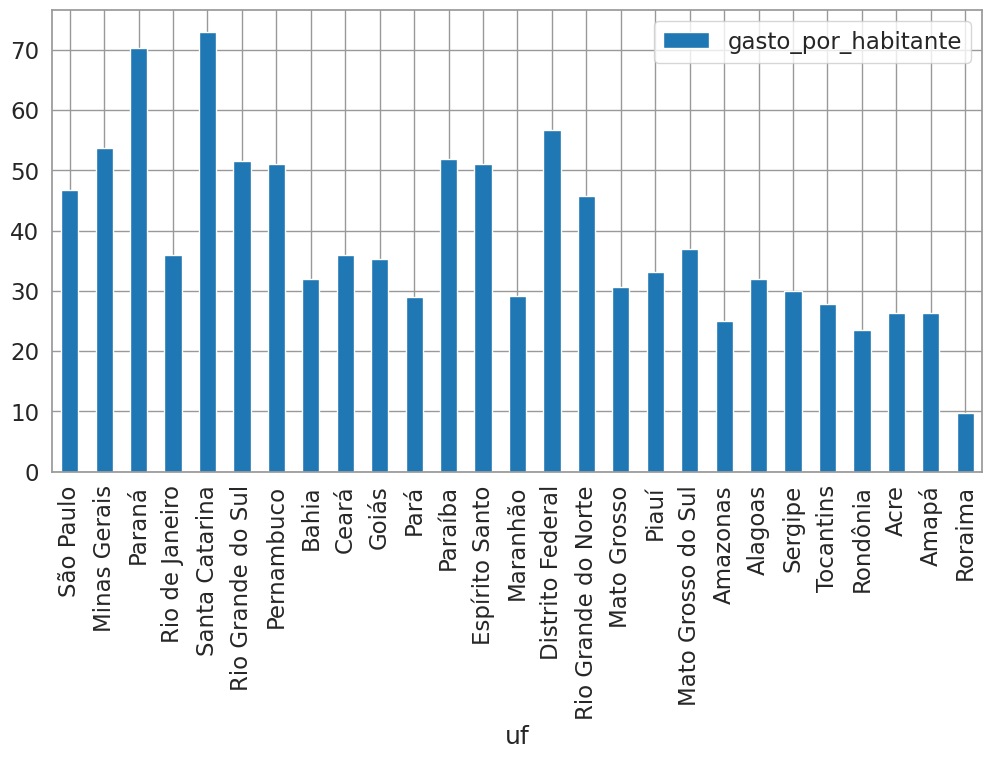

In [97]:
spending_pop_24.plot(kind='bar', y='gasto_por_habitante', figsize=(12, 6))

##### **Desafios:**

1. Desafio 01: Refinar o gráfico de barras, alterando a palete de cores, título, eixos e legendas.
2. Desafio 02: colocar uma linha horizontal na média dos gastos per capita.

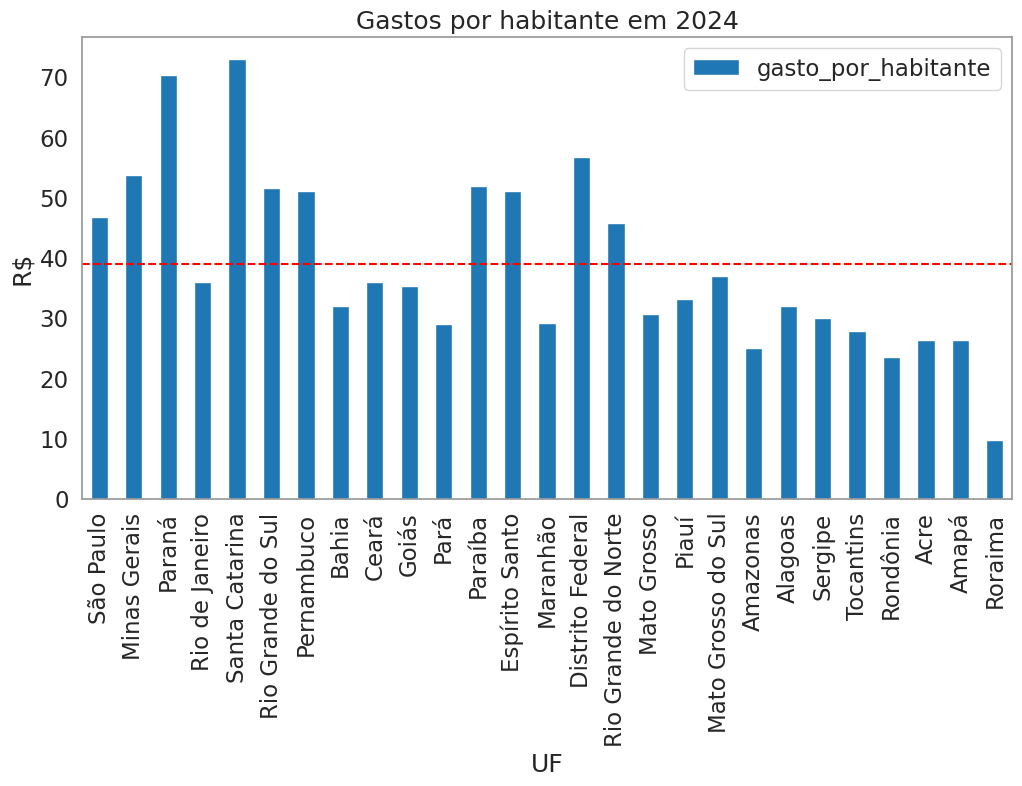

In [98]:
# Refinando o gráfico
spending_pop_24.plot(kind='bar', y='gasto_por_habitante', figsize=(12, 6))

plt.title('Gastos por habitante em 2024')
plt.ylabel('R$')
plt.xlabel('UF')
plt.grid()

#Colocando uma linha horizontal para representar a média de gastos por habitante
plt.axhline(spending_pop_24['gasto_por_habitante'].mean(), color='red', linestyle='--', label='Média')

#ordenando por gasto por habitante  
spending_pop_24 = spending_pop_24.sort_values('gasto_por_habitante', ascending=False)

plt.show()

3. Desafio 03: ordenando os estados por numero de habitantes e plotando o gráfico de gastos per capita.

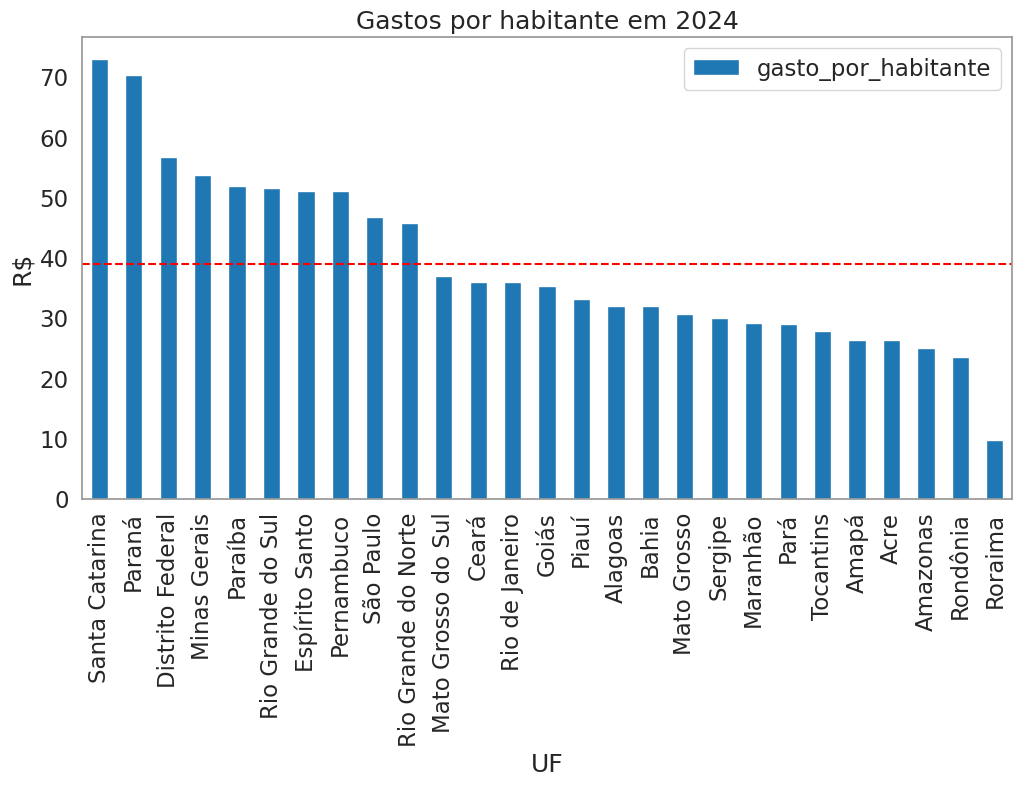

In [99]:
# odenando o grafico pelos estados por numero de habitantes
spending_pop_24.plot(kind='bar', y='gasto_por_habitante', figsize=(12, 6))

plt.title('Gastos por habitante em 2024')
plt.ylabel('R$')
plt.xlabel('UF')
plt.grid()

#Colocando uma linha horizontal para representar a média de gastos por habitante
plt.axhline(spending_pop_24['gasto_por_habitante'].mean(), color='red', linestyle='--', label='Média')

#ordenando numero de habitantes
spending_pop_24 = spending_pop_24.sort_values('populacao', ascending=False)

plt.show()


##### 2.2. Visualização de Dados com Seaborn

<Figure size 1200x1000 with 0 Axes>

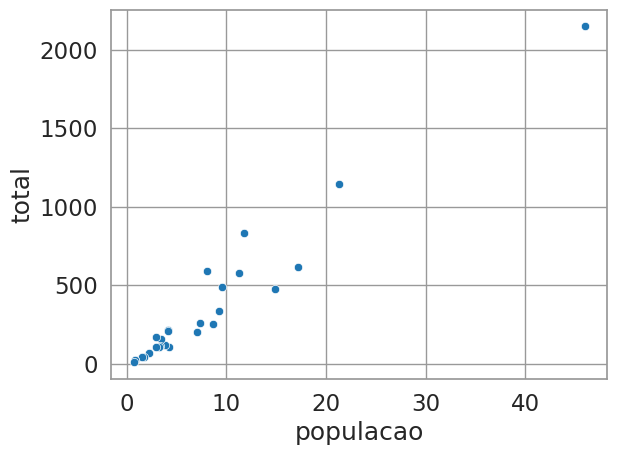

<Figure size 1200x1000 with 0 Axes>

In [100]:
#plotando o grafico de gastos por habitante em scatter
sns.scatterplot(data=spending_pop_24/1000000, x='populacao', y='total')
plt.figure(figsize=(12, 10))


<Figure size 1200x600 with 0 Axes>

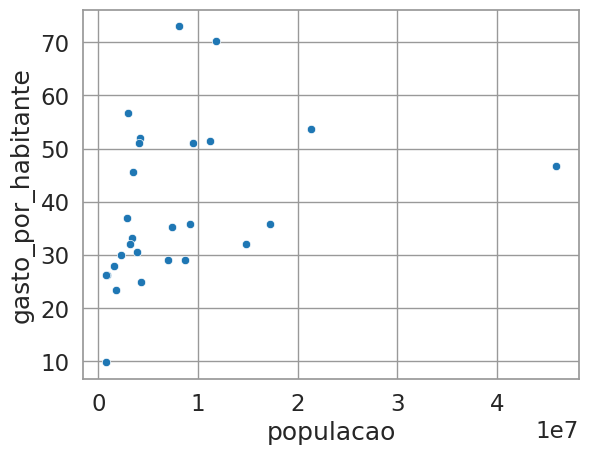

<Figure size 1200x600 with 0 Axes>

In [101]:
sns.scatterplot(data=spending_pop_24, x='populacao', y='gasto_por_habitante')
plt.figure(figsize=(12, 6))


##### **Desafios:**

1. Desafio 01: Refinar o gráfico de barras, alterando a palete de cores, título, eixos e legendas.
2. Desafio 02: plotar os dois graficos lado a lado, para que seja possivel a comparação dos dados.

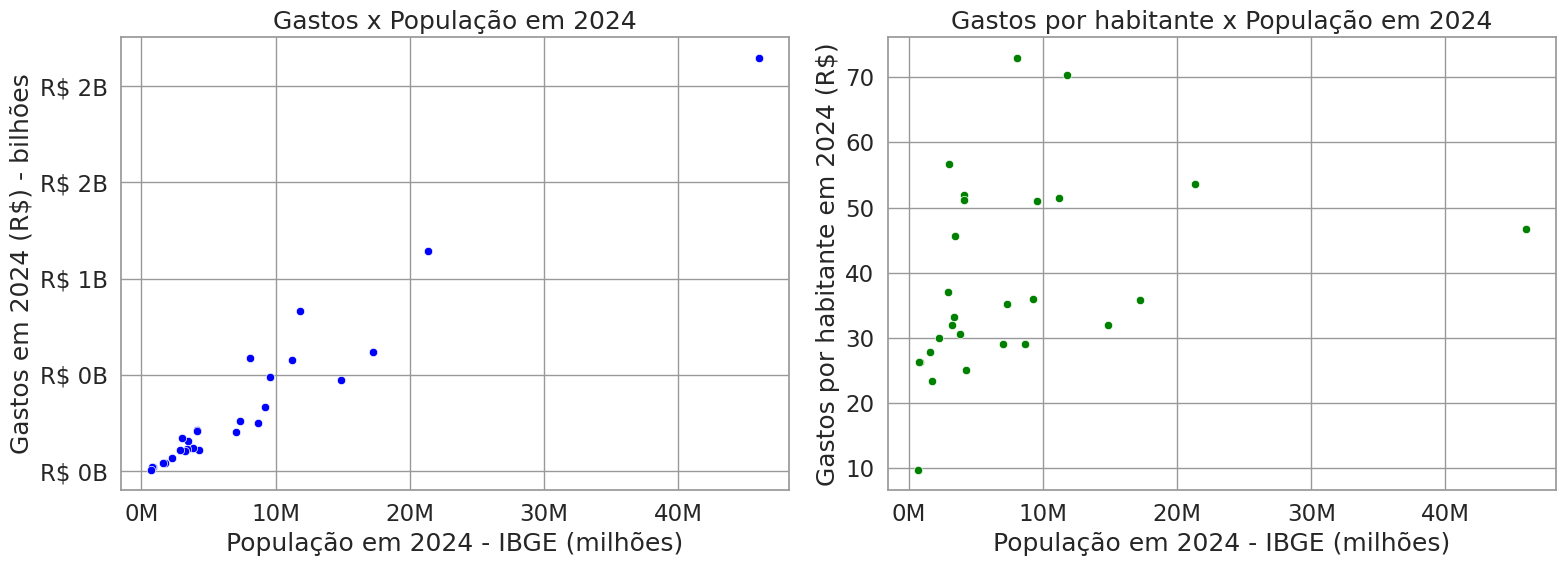

In [102]:
#plotando os dois graficos juntos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=spending_pop_24, x='populacao', y='total', ax=ax[0], color='blue')
ax[0].set_title('Gastos x População em 2024')
ax[0].set_xlabel('População em 2024 - IBGE (milhões)')
ax[0].set_ylabel('Gastos em 2024 (R$) - bilhões')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000000:,.0f}M'))
#dividindo o eixo y por 1 bilhão
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000000:,.0f}B'))


sns.scatterplot(data=spending_pop_24, x='populacao', y='gasto_por_habitante', ax=ax[1], color='green')
ax[1].set_title('Gastos por habitante x População em 2024')
ax[1].set_xlabel('População em 2024 - IBGE (milhões)')
ax[1].set_ylabel('Gastos por habitante em 2024 (R$)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000000:,.0f}M'))

plt.tight_layout()
plt.show()

#### Aula 3 - Visualização de Dados - Ticks, Escalas e Formação de Imagens

##### 3.1. Explorando a Visualização de Dados com Seaborn

* Selecionando um Estado para visualização dos dados.

In [103]:
spending_states24.head()

,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,total
uf,,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","2.146.862.552,86"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","1.144.713.997,32"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","831.521.510,65"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","617.581.855,33"
Santa Catarina,"108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","588.024.873,13"


In [104]:
#Retrira a coluna total
speding_month_24 = spending_states24.drop('total', axis=1)
speding_month_24.T.head()

uf,São Paulo,Minas Gerais,Paraná,Rio de Janeiro,Santa Catarina,Rio Grande do Sul,Pernambuco,Bahia,Ceará,Goiás,...,Piauí,Mato Grosso do Sul,Amazonas,Alagoas,Sergipe,Tocantins,Rondônia,Acre,Amapá,Roraima
2024/Jan,"397.238.888,73","222.300.157,90","160.622.546,08","125.351.624,45","108.845.317,14","120.372.550,76","87.154.661,78","101.309.815,12","68.104.664,24","49.939.313,00",...,"22.059.611,11","26.527.245,91","21.710.451,55","19.888.944,44","17.140.058,39","9.237.273,45","11.395.300,88","4.404.809,58","4.009.875,37","2.784.557,45"
2024/Fev,"380.600.275,32","209.800.599,55","156.350.201,45","112.879.820,43","111.565.393,23","110.113.378,72","81.983.296,27","91.419.828,81","63.811.880,19","46.611.854,37",...,"20.423.284,54","24.759.319,47","18.907.790,91","18.704.151,60","14.411.192,67","9.572.666,16","9.792.549,16","4.478.164,90","3.499.564,15","2.113.499,72"
2024/Mar,"405.238.898,93","228.100.016,47","167.688.877,25","123.235.922,60","116.528.753,76","120.372.124,21","88.256.016,78","97.196.666,40","65.031.493,74","53.782.625,22",...,"22.397.541,19","24.491.655,05","21.767.764,51","20.044.125,39","15.336.115,45","9.753.104,56","8.104.206,09","4.764.699,46","4.059.123,00","1.783.130,45"
2024/Abr,"405.415.546,71","216.082.730,78","154.184.685,67","113.767.297,88","115.840.578,79","114.128.856,86","92.833.652,07","84.744.298,49","64.193.695,76","47.946.449,59",...,"20.498.973,49","17.594.222,58","19.920.938,48","19.761.737,42","12.049.597,89","8.138.826,15","6.275.935,03","4.488.757,08","3.731.018,03","174.731,35"
2024/Mai,"357.246.934,02","178.930.809,27","127.199.121,21","96.747.362,37","91.637.957,49","77.476.354,15","88.546.267,22","66.032.184,30","47.716.409,58","40.085.222,73",...,"16.867.157,79","10.302.963,97","17.883.906,15","16.535.041,95","6.925.527,91","4.985.743,47","4.143.349,11","3.406.321,94","3.793.604,82","120.854,25"


<Figure size 1200x600 with 0 Axes>

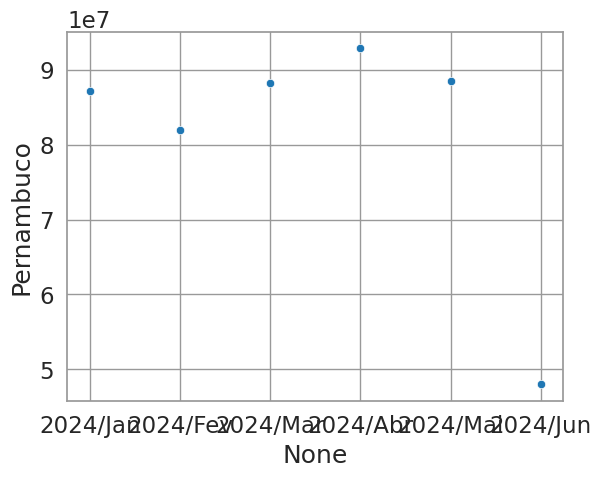

<Figure size 1200x600 with 0 Axes>

In [105]:
#plotando os gastos de Pernambuco em 2024
sns.scatterplot(data=speding_month_24.T, x = speding_month_24.columns, y = speding_month_24.T['Pernambuco'])
plt.figure(figsize=(12, 6))



##### **Desafios:**

1. Desafio 01: Refinar o gráfico de barras, alterando a palete de cores, título, eixos e legendas e plotar 02 estados juntos

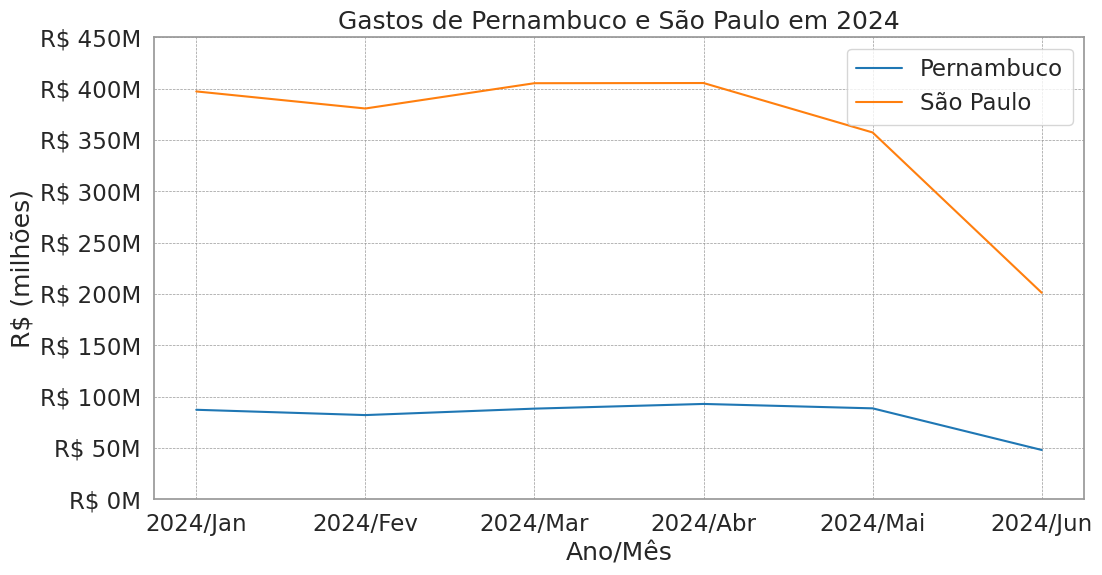

In [106]:
# plotando os gastos de Pernambuco e São Paulo em 2024 juntos
plt.figure(figsize=(12, 6))
sns.lineplot(data=speding_month_24.T, x = speding_month_24.columns, y = speding_month_24.T['Pernambuco']/1000000, label='Pernambuco')
sns.lineplot(data=speding_month_24.T, x = speding_month_24.columns, y = speding_month_24.T['São Paulo']/1000000, label='São Paulo')
plt.ylabel('R$ (milhões)')
plt.xlabel('Ano/Mês')
plt.title('Gastos de Pernambuco e São Paulo em 2024')
plt.legend(loc = 'upper right')
plt.grid(linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}M'))
plt.ylim(0, 450)

plt.show()

* Observação: Foi realizado a plotagem de 02 estados juntos, para que seja possivel a comparação dos dados. O desafio propõe a plotagem em scaterplot, mas foi realizado em linha para facilitar a visualização dos dados no tempo. Ademais no decorrer da aula os ajustes são feitos em um grafico de linha mas não aparece a troca no video explicitamente.

#### Aula 4 - Trabalhando Datetime e Melt

##### 4.1. Trabalhando com Datas


In [107]:
spending_states.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Região
uf,,,,,,,,,,,,,,,,,,,,,
São Paulo,"173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94","175.887.493,92","179.821.352,27","180.567.746,84","180.503.167,36","192.745.719,34","192.805.871,58",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15",Sudeste
Minas Gerais,"70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12","79.632.111,54","82.225.138,22","80.374.117,08","82.442.262,90","88.613.476,60","84.486.996,11",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35",Sudeste
Paraná,"48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93","56.094.754,74","59.802.402,07","56.699.001,13","58.091.985,79","61.365.941,22","59.667.208,62",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99",Sul
Rio Grande do Sul,"45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79","53.759.674,01","56.391.647,77","56.233.758,74","57.910.170,98","59.592.124,91","57.565.742,08",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55",Sul
Rio de Janeiro,"44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46","44.143.987,63","44.360.299,24","42.502.172,22","43.066.461,47","44.553.314,55","41.351.511,51",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60",Sudeste


In [108]:
mensal = spending_states.drop('Região', axis=1)
mensal = mensal.T
mensal.head()

uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Rondônia,Tocantins,Acre,Roraima,Amapá
2008/Fev,"173.597.042,74","70.301.089,50","48.855.046,46","45.897.704,82","44.128.159,73","33.410.124,06","26.222.079,10","24.409.572,92","27.643.304,86","18.149.374,27",...,"9.711.680,20","7.929.894,93","8.112.220,30","7.934.652,10","4.636.850,76","1.940.792,63","5.051.932,07","1.743.978,66","771.687,83","1.275.063,72"
2008/Mar,"170.903.108,82","79.119.005,51","55.611.791,07","52.928.695,92","42.933.765,97","41.400.851,46","30.716.361,81","27.483.480,50","30.085.370,22","20.992.213,03",...,"10.428.191,09","9.416.367,68","9.210.505,56","8.641.517,13","5.017.838,07","1.955.721,68","5.200.151,87","2.057.439,02","876.091,18","1.177.745,93"
2008/Abr,"170.623.851,29","79.046.322,41","56.115.135,82","51.972.416,77","45.324.789,60","42.826.993,62","30.589.332,79","27.806.641,44","31.376.221,00","21.049.477,30",...,"10.227.943,00","9.390.588,03","10.466.691,94","8.531.576,49","5.265.951,03","2.143.353,81","5.343.714,73","2.057.829,69","896.952,53","1.396.371,51"
2008/Mai,"172.764.762,94","79.268.070,12","55.574.831,93","51.679.350,79","43.951.349,46","42.170.109,18","31.424.612,72","28.354.279,52","31.189.904,62","19.162.546,79",...,"10.562.148,66","9.378.197,25","9.844.096,03","9.079.902,15","5.367.094,94","2.280.382,58","5.344.487,99","2.226.577,93","1.027.288,73","1.411.520,77"
2008/Jun,"175.887.493,92","79.632.111,54","56.094.754,74","53.759.674,01","44.143.987,63","39.910.042,40","28.947.510,92","28.993.292,76","29.463.965,11","20.541.237,79",...,"10.465.088,93","9.450.300,60","10.359.879,02","8.646.295,77","4.981.036,36","2.624.542,97","5.398.413,09","2.112.576,82","938.293,54","1.420.892,01"


In [109]:
def f(x):
    print(f"valor: {x}")
mensal.index.map(f)

valor: 2008/Fev
valor: 2008/Mar
valor: 2008/Abr
valor: 2008/Mai
valor: 2008/Jun
valor: 2008/Jul
valor: 2008/Ago
valor: 2008/Set
valor: 2008/Out
valor: 2008/Nov
valor: 2008/Dez
valor: 2009/Jan
valor: 2009/Fev
valor: 2009/Mar
valor: 2009/Abr
valor: 2009/Mai
valor: 2009/Jun
valor: 2009/Jul
valor: 2009/Ago
valor: 2009/Set
valor: 2009/Out
valor: 2009/Nov
valor: 2009/Dez
valor: 2010/Jan
valor: 2010/Fev
valor: 2010/Mar
valor: 2010/Abr
valor: 2010/Mai
valor: 2010/Jun
valor: 2010/Jul
valor: 2010/Ago
valor: 2010/Set
valor: 2010/Out
valor: 2010/Nov
valor: 2010/Dez
valor: 2011/Jan
valor: 2011/Fev
valor: 2011/Mar
valor: 2011/Abr
valor: 2011/Mai
valor: 2011/Jun
valor: 2011/Jul
valor: 2011/Ago
valor: 2011/Set
valor: 2011/Out
valor: 2011/Nov
valor: 2011/Dez
valor: 2012/Jan
valor: 2012/Fev
valor: 2012/Mar
valor: 2012/Abr
valor: 2012/Mai
valor: 2012/Jun
valor: 2012/Jul
valor: 2012/Ago
valor: 2012/Set
valor: 2012/Out
valor: 2012/Nov
valor: 2012/Dez
valor: 2013/Jan
valor: 2013/Fev
valor: 2013/Mar
valor: 2

Index([None, None, None, None, None, None, None, None, None, None,
       ...
       None, None, None, None, None, None, None, None, None, None],
      dtype='object', length=197)

In [110]:
meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def fordate(ano_mes:str):
    ano: int = int(ano_mes[:4])
    mes_str: str = ano_mes[5:]
    mes: int = meses[mes_str]
    return date(ano, mes, 1)

In [111]:
mensal.index = mensal.index.map(fordate)
#mensal.index = pd.to_datetime(mensal.index)
mensal.head()


uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Rondônia,Tocantins,Acre,Roraima,Amapá
2008-02-01,"173.597.042,74","70.301.089,50","48.855.046,46","45.897.704,82","44.128.159,73","33.410.124,06","26.222.079,10","24.409.572,92","27.643.304,86","18.149.374,27",...,"9.711.680,20","7.929.894,93","8.112.220,30","7.934.652,10","4.636.850,76","1.940.792,63","5.051.932,07","1.743.978,66","771.687,83","1.275.063,72"
2008-03-01,"170.903.108,82","79.119.005,51","55.611.791,07","52.928.695,92","42.933.765,97","41.400.851,46","30.716.361,81","27.483.480,50","30.085.370,22","20.992.213,03",...,"10.428.191,09","9.416.367,68","9.210.505,56","8.641.517,13","5.017.838,07","1.955.721,68","5.200.151,87","2.057.439,02","876.091,18","1.177.745,93"
2008-04-01,"170.623.851,29","79.046.322,41","56.115.135,82","51.972.416,77","45.324.789,60","42.826.993,62","30.589.332,79","27.806.641,44","31.376.221,00","21.049.477,30",...,"10.227.943,00","9.390.588,03","10.466.691,94","8.531.576,49","5.265.951,03","2.143.353,81","5.343.714,73","2.057.829,69","896.952,53","1.396.371,51"
2008-05-01,"172.764.762,94","79.268.070,12","55.574.831,93","51.679.350,79","43.951.349,46","42.170.109,18","31.424.612,72","28.354.279,52","31.189.904,62","19.162.546,79",...,"10.562.148,66","9.378.197,25","9.844.096,03","9.079.902,15","5.367.094,94","2.280.382,58","5.344.487,99","2.226.577,93","1.027.288,73","1.411.520,77"
2008-06-01,"175.887.493,92","79.632.111,54","56.094.754,74","53.759.674,01","44.143.987,63","39.910.042,40","28.947.510,92","28.993.292,76","29.463.965,11","20.541.237,79",...,"10.465.088,93","9.450.300,60","10.359.879,02","8.646.295,77","4.981.036,36","2.624.542,97","5.398.413,09","2.112.576,82","938.293,54","1.420.892,01"


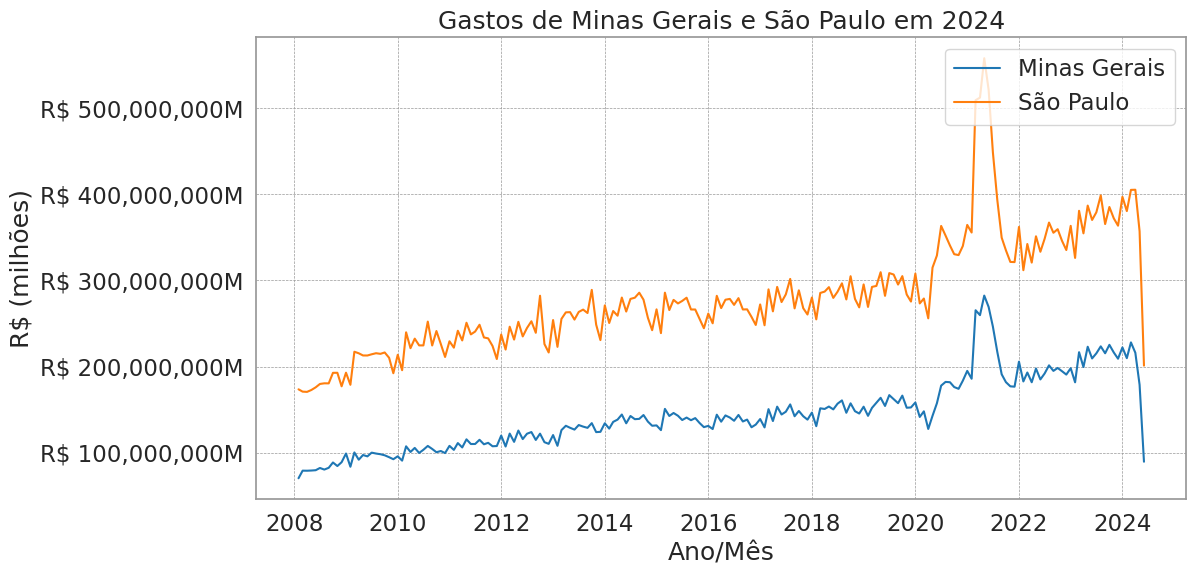

In [112]:
#plotando o grafico de gastos mensais sao paulo e minas gerais
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal, x=mensal.index, y='Minas Gerais', label='Minas Gerais')
sns.lineplot(data=mensal, x=mensal.index, y='São Paulo', label='São Paulo')
plt.ylabel('R$ (milhões)')
plt.xlabel('Ano/Mês')
plt.title('Gastos de Minas Gerais e São Paulo em 2024')
plt.legend(loc = 'upper right')
plt.grid(linestyle='--', linewidth=0.5)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}M'))

plt.show()


##### 4.2. Trabalhando com Melt

In [113]:
mensal_aberto = mensal.reset_index().melt(id_vars=(['index']), value_vars=mensal.columns)
mensal_aberto.columns = ['ano_mes_dia', 'uf', 'gasto']
mensal_aberto.head()

,ano_mes_dia,uf,gasto
0,2008-02-01,São Paulo,"173.597.042,74"
1,2008-03-01,São Paulo,"170.903.108,82"
2,2008-04-01,São Paulo,"170.623.851,29"
3,2008-05-01,São Paulo,"172.764.762,94"
4,2008-06-01,São Paulo,"175.887.493,92"


##### **Desafios:**
1. Desafio opcocional: revertendo o melt, para que seja possivel a visualização dos dados de gastos por mês.

In [114]:
#usando pivot_table para reorganizar os dados
mensal_original = mensal_aberto.pivot_table(index='ano_mes_dia', columns='uf', values='gasto')
mensal_original.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
ano_mes_dia,,,,,,,,,,,,,,,,,,,,,
2008-02-01,"1.743.978,66","8.112.220,30","1.275.063,72","7.934.652,10","33.410.124,06","27.643.304,86","10.215.956,80","10.032.886,43","18.149.374,27","13.452.263,93",...,"9.711.680,20","9.110.108,87","45.897.704,82","44.128.159,73","1.940.792,63","771.687,83","24.409.572,92","4.636.850,76","173.597.042,74","5.051.932,07"
2008-03-01,"2.057.439,02","9.210.505,56","1.177.745,93","8.641.517,13","41.400.851,46","30.085.370,22","11.627.918,26","12.262.049,08","20.992.213,03","14.750.895,33",...,"10.428.191,09","10.126.626,54","52.928.695,92","42.933.765,97","1.955.721,68","876.091,18","27.483.480,50","5.017.838,07","170.903.108,82","5.200.151,87"
2008-04-01,"2.057.829,69","10.466.691,94","1.396.371,51","8.531.576,49","42.826.993,62","31.376.221,00","11.922.015,36","12.453.466,98","21.049.477,30","15.148.647,11",...,"10.227.943,00","10.964.234,85","51.972.416,77","45.324.789,60","2.143.353,81","896.952,53","27.806.641,44","5.265.951,03","170.623.851,29","5.343.714,73"
2008-05-01,"2.226.577,93","9.844.096,03","1.411.520,77","9.079.902,15","42.170.109,18","31.189.904,62","11.900.817,00","11.789.786,09","19.162.546,79","14.543.679,92",...,"10.562.148,66","11.032.871,23","51.679.350,79","43.951.349,46","2.280.382,58","1.027.288,73","28.354.279,52","5.367.094,94","172.764.762,94","5.344.487,99"
2008-06-01,"2.112.576,82","10.359.879,02","1.420.892,01","8.646.295,77","39.910.042,40","29.463.965,11","11.969.271,76","11.889.687,35","20.541.237,79","14.553.978,06",...,"10.465.088,93","10.450.599,08","53.759.674,01","44.143.987,63","2.624.542,97","938.293,54","28.993.292,76","4.981.036,36","175.887.493,92","5.398.413,09"


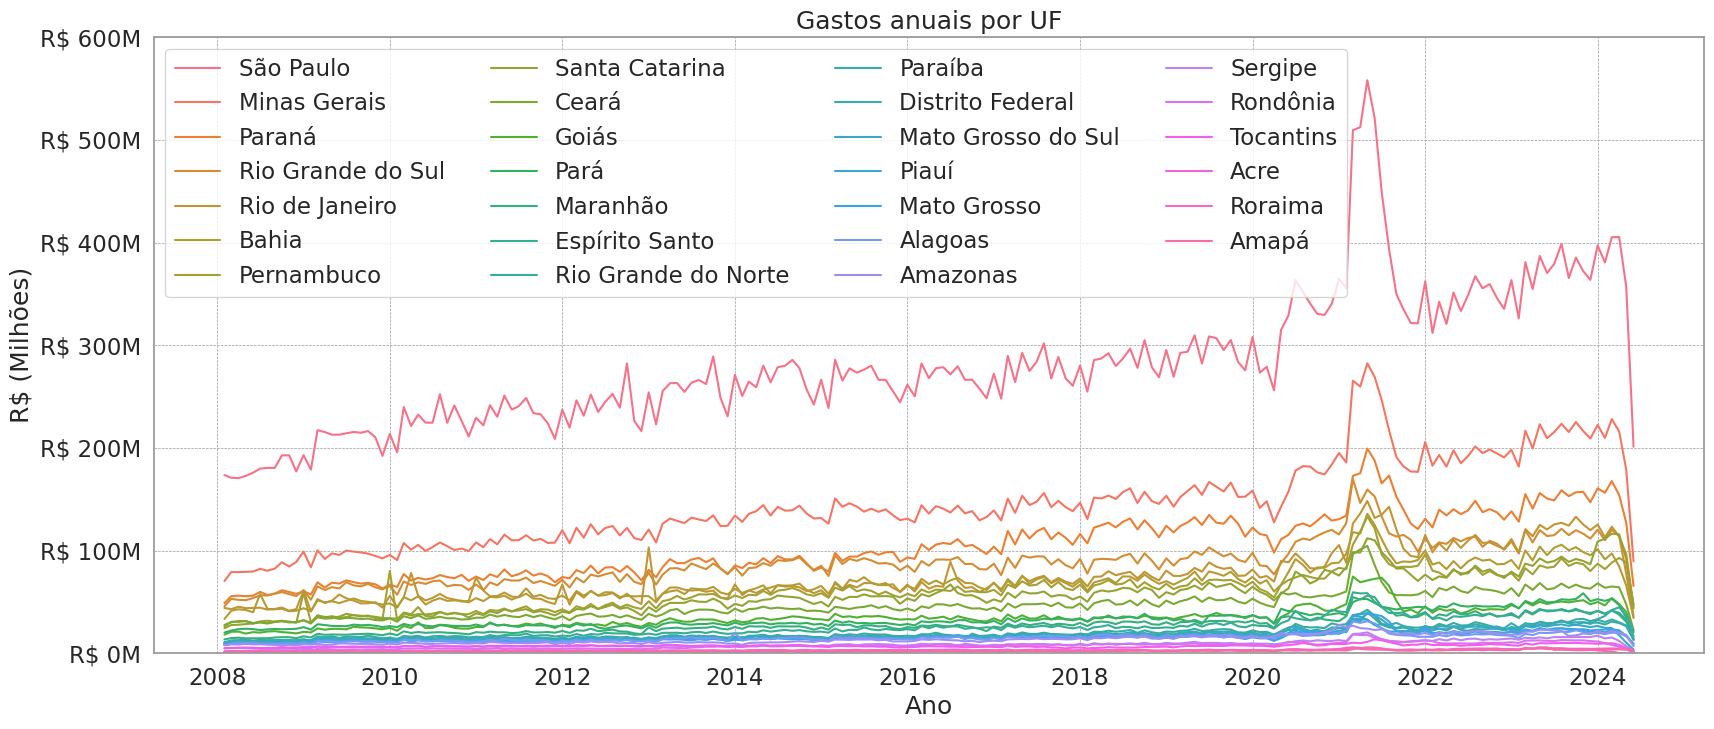

In [115]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=mensal_aberto, x='ano_mes_dia', y='gasto', hue='uf')
plt.ylim(0, 600000000)
plt.grid(linestyle='--', linewidth=0.5)
plt.ylabel('R$ (Milhões)')
plt.xlabel('Ano')
plt.title('Gastos anuais por UF')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.legend(loc='upper left', ncol=4)

plt.show()

##### **Desafios:**
1. Desafio 01: plotar dois estados juntos, para que seja possivel a comparação dos dados.
3. Desafio 02: Formatar legenda e eixos do gráfico.
4. Desafio 03 : Formatar o grid do gráfico com o seaborn.

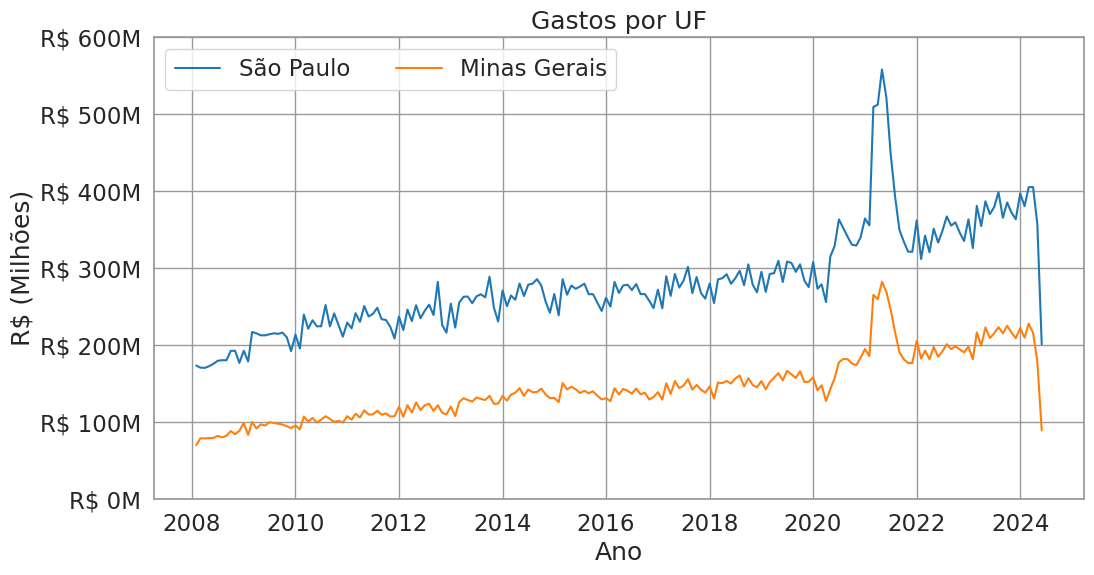

In [116]:
#plotando o grafico de gastos mensais de dois estados usando o mensal_aberto
plt.figure(figsize=(12, 6))
axis = sns.lineplot(data=mensal_aberto[mensal_aberto['uf'].isin(['São Paulo', 'Minas Gerais'])], x='ano_mes_dia', y='gasto', hue='uf')
plt.ylim(0, 600000000)
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.ylabel('R$ (Milhões)')
plt.xlabel('Ano')
plt.title('Gastos por UF')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.legend(loc='upper left', ncol=3)

plt.show()


#### Aula 5 - Manipulando datas e gerando novas análises
##### 5.1. Criando gastos relativos

In [117]:
mensal_aberto.head()


,ano_mes_dia,uf,gasto
0,2008-02-01,São Paulo,"173.597.042,74"
1,2008-03-01,São Paulo,"170.903.108,82"
2,2008-04-01,São Paulo,"170.623.851,29"
3,2008-05-01,São Paulo,"172.764.762,94"
4,2008-06-01,São Paulo,"175.887.493,92"


* Garantindo que a coluna de data seja do tipo datetime, para que seja possivel a manipulação dos dados de data.

In [118]:
mensal_aberto['ano_mes_dia'] = pd.to_datetime(mensal_aberto['ano_mes_dia'])

* Criando as colunas de mês e ano, para que seja possivel a manipulação dos dados de data.

In [119]:
mensal_aberto['ano'] = mensal_aberto['ano_mes_dia'].dt.year
mensal_aberto['mes'] = mensal_aberto['ano_mes_dia'].dt.month
mensal_aberto.head()

,ano_mes_dia,uf,gasto,ano,mes
0,2008-02-01,São Paulo,"173.597.042,74",2008,2
1,2008-03-01,São Paulo,"170.903.108,82",2008,3
2,2008-04-01,São Paulo,"170.623.851,29",2008,4
3,2008-05-01,São Paulo,"172.764.762,94",2008,5
4,2008-06-01,São Paulo,"175.887.493,92",2008,6


* Filtrando o estado de São Paulo utilizando a função query

In [120]:
mensal_aberto.query('uf == "São Paulo"')

,ano_mes_dia,uf,gasto,ano,mes
0,2008-02-01,São Paulo,"173.597.042,74",2008,2
1,2008-03-01,São Paulo,"170.903.108,82",2008,3
2,2008-04-01,São Paulo,"170.623.851,29",2008,4
3,2008-05-01,São Paulo,"172.764.762,94",2008,5
4,2008-06-01,São Paulo,"175.887.493,92",2008,6
...,...,...,...,...,...
192,2024-02-01,São Paulo,"380.600.275,32",2024,2
193,2024-03-01,São Paulo,"405.238.898,93",2024,3
194,2024-04-01,São Paulo,"405.415.546,71",2024,4
195,2024-05-01,São Paulo,"357.246.934,02",2024,5


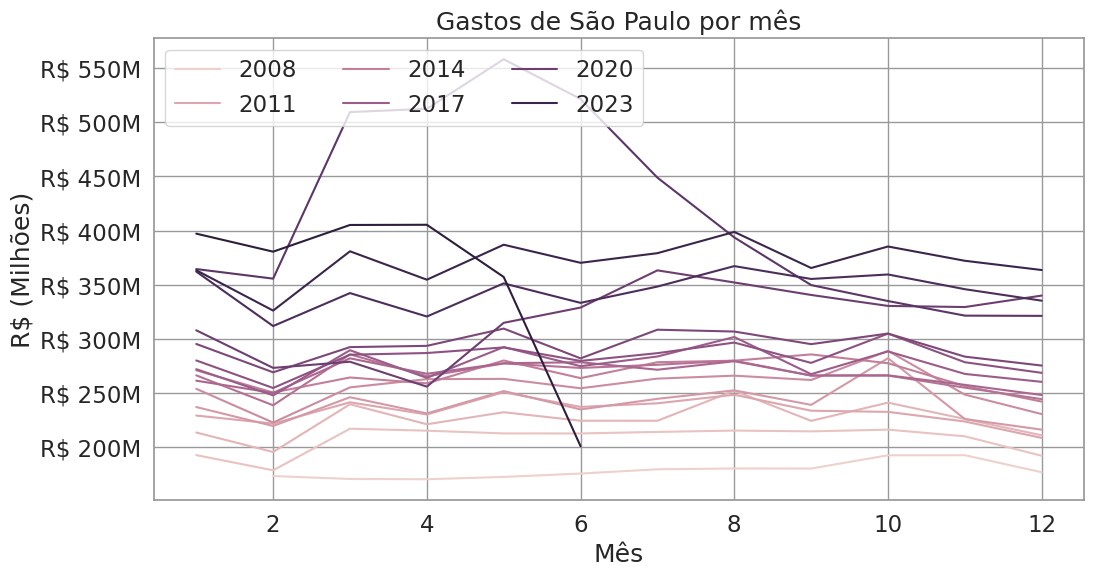

In [121]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto', hue='ano')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Mês')
plt.title('Gastos de São Paulo por mês')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.legend(loc='upper left', ncol=3)

plt.show()



##### **Desafios:**
1. Desafio 01: plotar dois estados juntos, para que seja possivel a comparação dos dados. (Escolher um ano para plotar)
3. Desafio 02: Formatar legenda e eixos do gráfico, cores e estilo.

In [122]:
# Definir um dicionário com os meses
meses = {
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'
}


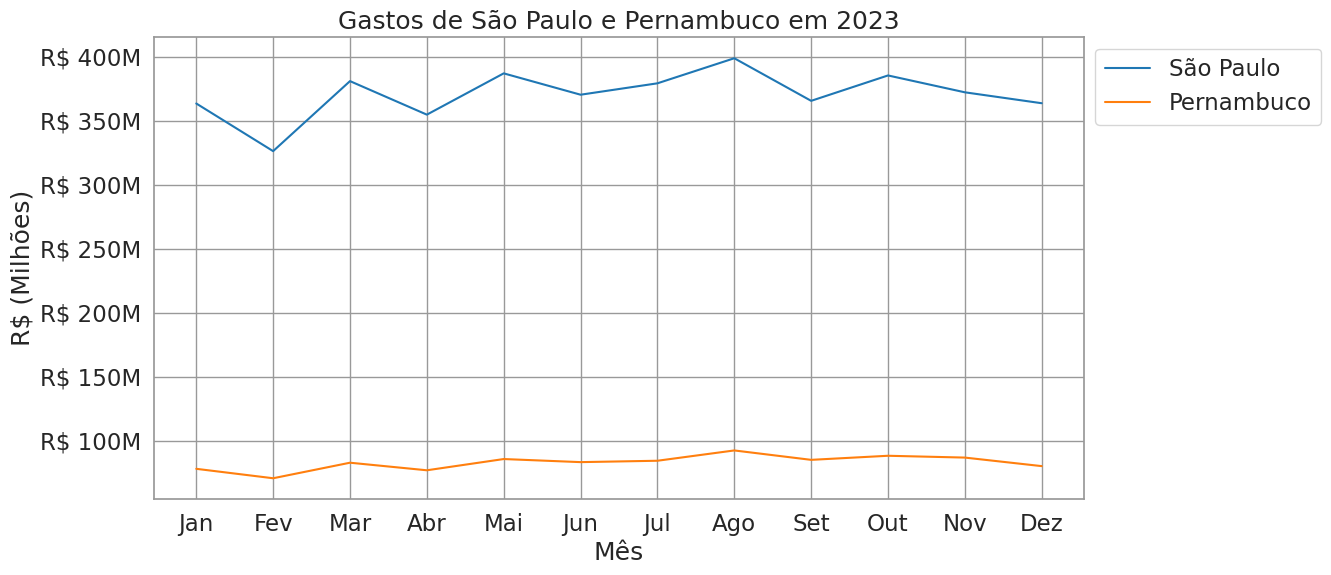

In [123]:
#plotando o grafico dos estados São Paulo e Permanbuco selecionados o ano de 2023
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal_aberto.query('uf in ["São Paulo", "Pernambuco"] and ano == 2023'), x='mes', y='gasto', hue='uf')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Mês')
plt.title('Gastos de São Paulo e Pernambuco em 2023')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.xticks(ticks=range(1, 13), labels=[meses[mes] for mes in range(1, 13)])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [124]:
#criando um dicionario com os meses e seus respectivos dias
dias_por_mes = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}

In [125]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] /mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,ano_mes_dia,uf,gasto,ano,mes,gasto_diario
0,2008-02-01,São Paulo,"173.597.042,74",2008,2,"6.199.894,38"
1,2008-03-01,São Paulo,"170.903.108,82",2008,3,"5.513.003,51"
2,2008-04-01,São Paulo,"170.623.851,29",2008,4,"5.687.461,71"
3,2008-05-01,São Paulo,"172.764.762,94",2008,5,"5.573.056,87"
4,2008-06-01,São Paulo,"175.887.493,92",2008,6,"5.862.916,46"


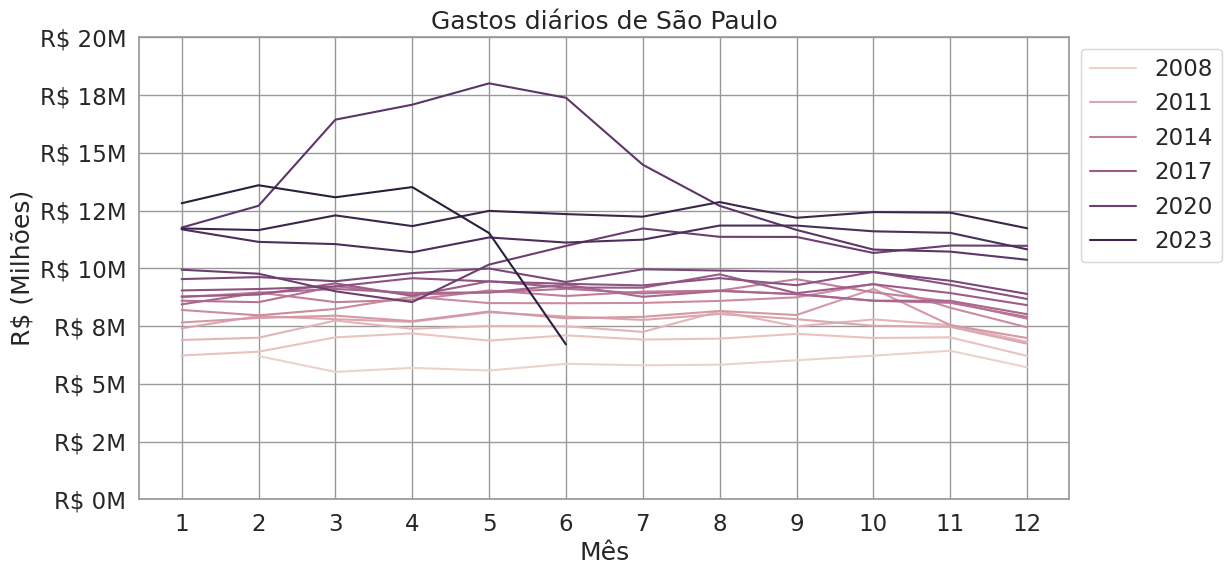

In [126]:
#plotando o grafico de gastos diarios de São Paulo
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto_diario', hue='ano')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Mês')
plt.title('Gastos diários de São Paulo')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylim(0, 20000000)

plt.show()

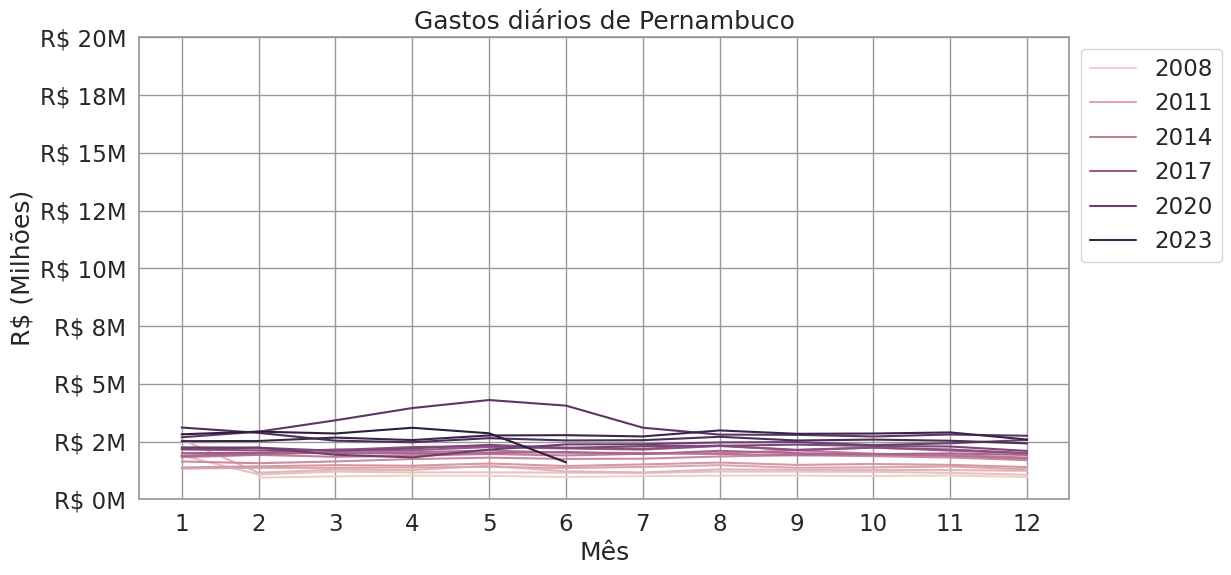

In [127]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal_aberto.query('uf == "Pernambuco"'), x='mes', y='gasto_diario', hue='ano')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Mês')
plt.title('Gastos diários de Pernambuco')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(0, 20000000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

##### **Desafios:**
1. Desafio 01: plotar dois estados juntos, para que seja possivel a comparação dos dados. (Escolher um ano para plotar)
3. Desafio 02: Crie um grafico de linha para visualizar os gastos por dia por pessoa desses dois estados.

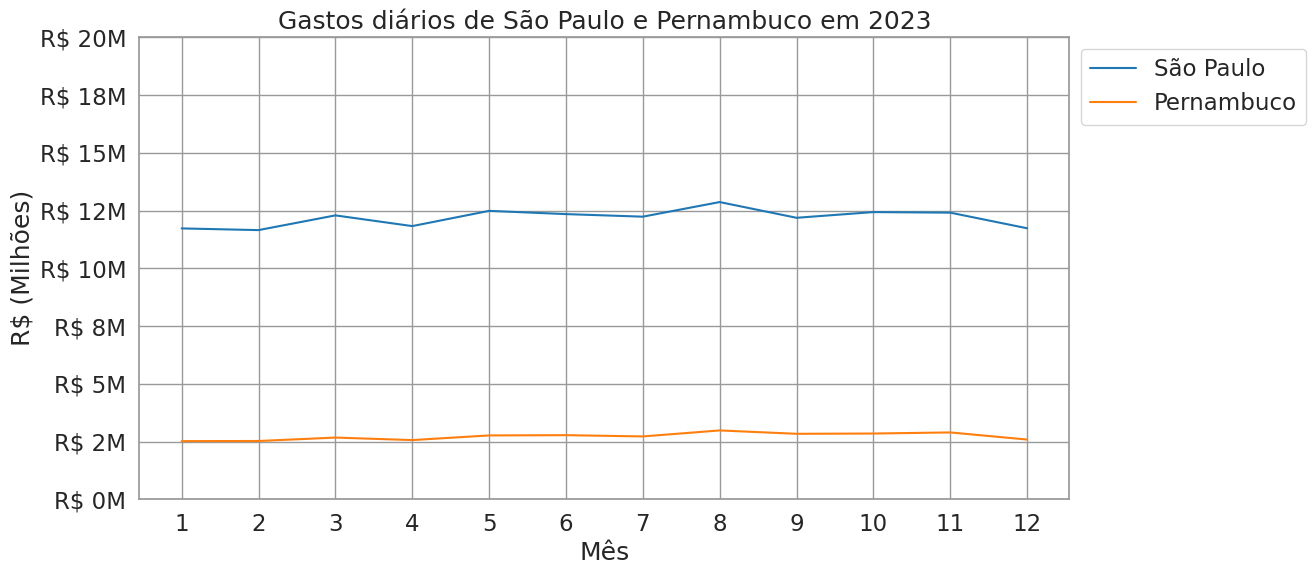

In [128]:
#plotando o grafico de gastos diarios de São Paulo e Pernambuco escolhendo o ano de 2023
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal_aberto.query('uf in ["São Paulo", "Pernambuco"] and ano == 2023'), x='mes', y='gasto_diario', hue='uf')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Mês')
plt.title('Gastos diários de São Paulo e Pernambuco em 2023')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylim(0, 20000000)

plt.show()

* Observação: Foi escolhido o ano de 2023 para plot pois o ano não era bissexto e o mês de fevereiro não teria um dia a mais o que nao impactaria no calculo dos gastos diários ademais o ano de 2023 já ultrapassa os viés que poderia ocorrer com os gastos de anos da pandemia de covid.

In [129]:
#calculando o gastodiario por habitante de cada estado
mensal_aberto = mensal_aberto.set_index('uf')
mensal_aberto_percapta = mensal_aberto.join(ibge_copy)
mensal_aberto_percapta.head()

,ano_mes_dia,gasto,ano,mes,gasto_diario,populacao
uf,,,,,,
São Paulo,2008-02-01,"173.597.042,74",2008,2,"6.199.894,38",45973194
São Paulo,2008-03-01,"170.903.108,82",2008,3,"5.513.003,51",45973194
São Paulo,2008-04-01,"170.623.851,29",2008,4,"5.687.461,71",45973194
São Paulo,2008-05-01,"172.764.762,94",2008,5,"5.573.056,87",45973194
São Paulo,2008-06-01,"175.887.493,92",2008,6,"5.862.916,46",45973194


In [130]:
#calculando o gasto diario percapta
mensal_aberto_percapta['gasto_diario_percapta'] = mensal_aberto_percapta['gasto_diario'] / mensal_aberto_percapta['populacao']
mensal_aberto_percapta.head()


,ano_mes_dia,gasto,ano,mes,gasto_diario,populacao,gasto_diario_percapta
uf,,,,,,,
São Paulo,2008-02-01,"173.597.042,74",2008,2,"6.199.894,38",45973194,"0,13"
São Paulo,2008-03-01,"170.903.108,82",2008,3,"5.513.003,51",45973194,"0,12"
São Paulo,2008-04-01,"170.623.851,29",2008,4,"5.687.461,71",45973194,"0,12"
São Paulo,2008-05-01,"172.764.762,94",2008,5,"5.573.056,87",45973194,"0,12"
São Paulo,2008-06-01,"175.887.493,92",2008,6,"5.862.916,46",45973194,"0,13"


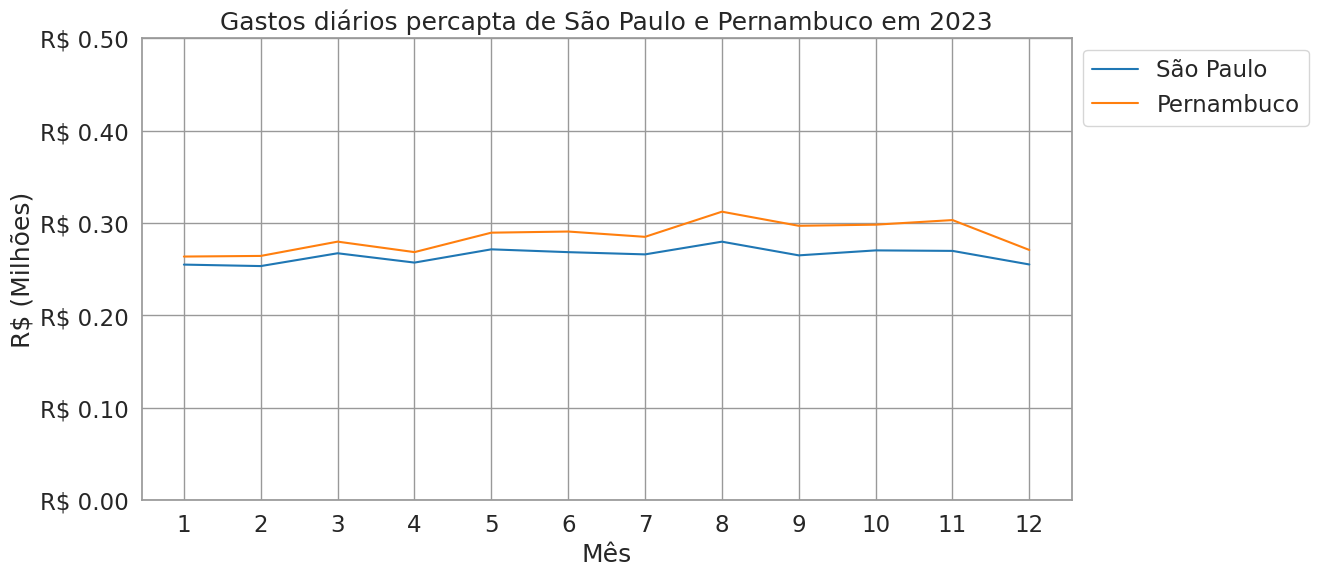

In [131]:
# plotando o grafico de gastos diarios percapta de São Paulo e Pernambuco no ano de 2023
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensal_aberto_percapta.query('ano == 2023 and uf in ["São Paulo", "Pernambuco"]'), x='mes', y='gasto_diario_percapta', hue='uf')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Mês')
plt.title('Gastos diários percapta de São Paulo e Pernambuco em 2023')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylim(0, 0.5)

plt.show()


#### Aula 6 - Agrupando Dados e Analisando por Categoria

In [132]:
mensal_meu_estado = mensal_aberto.query('uf == "Pernambuco"')
mensal_meu_estado.head()

,ano_mes_dia,gasto,ano,mes,gasto_diario
uf,,,,,
Pernambuco,2008-02-01,"26.222.079,10",2008,2,"936.502,83"
Pernambuco,2008-03-01,"30.716.361,81",2008,3,"990.850,38"
Pernambuco,2008-04-01,"30.589.332,79",2008,4,"1.019.644,43"
Pernambuco,2008-05-01,"31.424.612,72",2008,5,"1.013.697,18"
Pernambuco,2008-06-01,"28.947.510,92",2008,6,"964.917,03"


In [133]:
mensal_meu_estado.dtypes

ano_mes_dia     datetime64[ns]
gasto                  float64
ano                      int32
mes                      int32
gasto_diario           float64
dtype: object

In [134]:
# agrupando os gastos mensais por ano
gastos_ano = mensal_meu_estado.groupby('ano').sum(['gasto', 'gasto_diario'])
gastos_ano.head()


,gasto,mes,gasto_diario
ano,,,
2008,"333.108.341,75",77,"10.966.306,95"
2009,"443.702.553,69",78,"14.566.788,85"
2010,"500.952.464,61",78,"16.432.521,98"
2011,"502.313.896,78",78,"16.512.962,65"
2012,"538.887.776,08",78,"17.710.599,06"


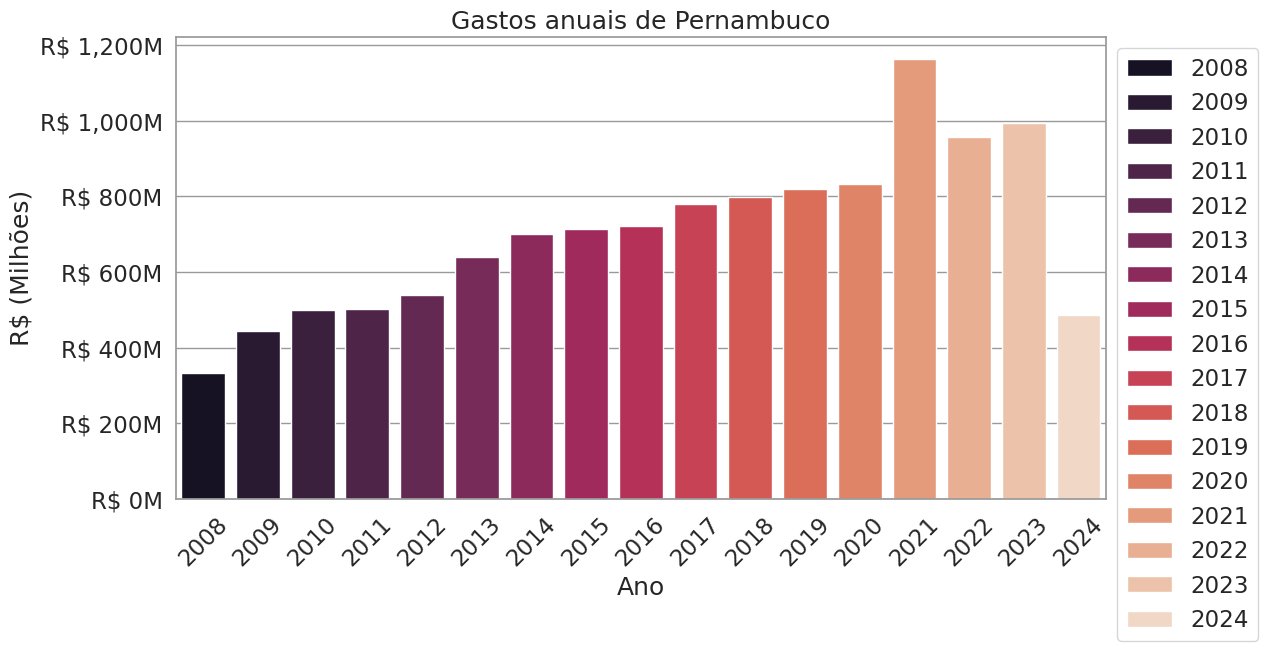

In [135]:
#plotando o grafico de gastos anuais de Pernambuco por ano
paleta = sns.color_palette('rocket', n_colors=17)

plt.figure(figsize=(12, 6))
sns.barplot(data=gastos_ano, x=gastos_ano.index, y='gasto', palette= paleta, hue=gastos_ano.index)
plt.ylabel('R$ (Milhões)')
plt.xlabel('Ano')
plt.title('Gastos anuais de Pernambuco')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()

#### Desafios:
1. Desafio 01: plotar utilizando a paleta de cores com os maiores gastos para tons mais escuros.

/tmp/ipykernel_21689/2978967905.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gastos_ano, x=gastos_ano.index, y='gasto', palette=colors)


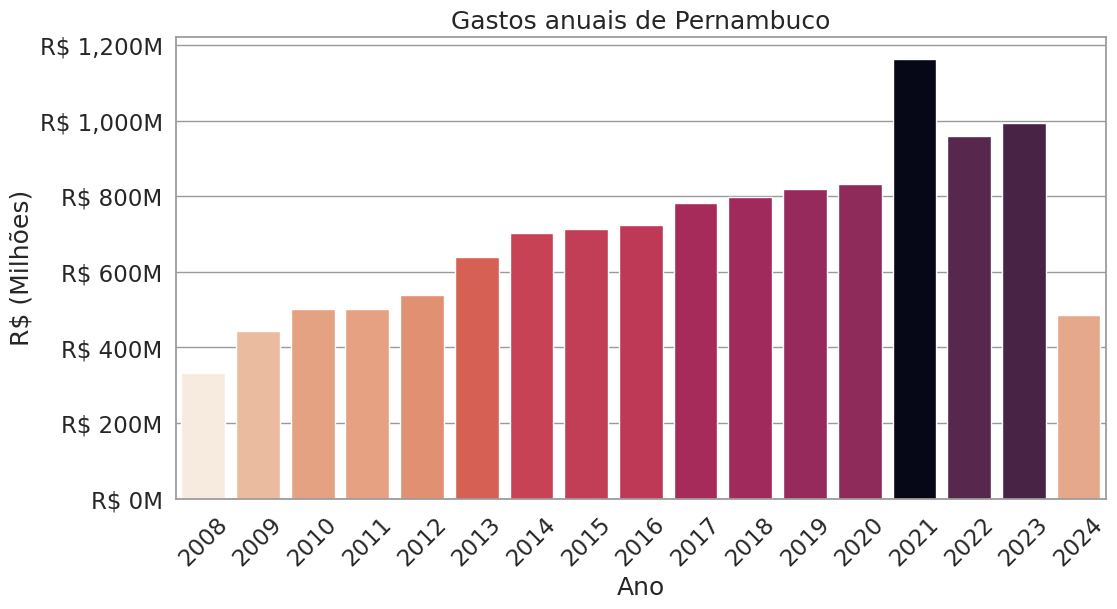

In [148]:


cmap = sns.color_palette("rocket_r", as_cmap=True) 
norm = plt.Normalize(gastos_ano['gasto'].min(), gastos_ano['gasto'].max())

plt.figure(figsize=(12, 6))
colors = [cmap(norm(value)) for value in gastos_ano['gasto']]

sns.barplot(data=gastos_ano, x=gastos_ano.index, y='gasto', palette=colors)
plt.ylabel('R$ (Milhões)')
plt.xlabel('Ano')
plt.title('Gastos anuais de Pernambuco')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.xticks(rotation=45)


plt.show()


In [136]:
estados = ['Amazonas', 'Mato Grosso', 'Pernambuco']
por_ano_dos_estados = mensal_aberto.query('uf in @estados').groupby(['uf', 'ano']).sum(['gasto', 'gasto_diario']).reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Amazonas,2008,"91.277.492,92",77,"3.007.437,03"
1,Amazonas,2009,"106.491.315,75",78,"3.502.265,33"
2,Amazonas,2010,"114.175.777,25",78,"3.753.337,90"
3,Amazonas,2011,"120.263.314,00",78,"3.956.349,31"
4,Amazonas,2012,"122.916.860,05",78,"4.039.828,12"


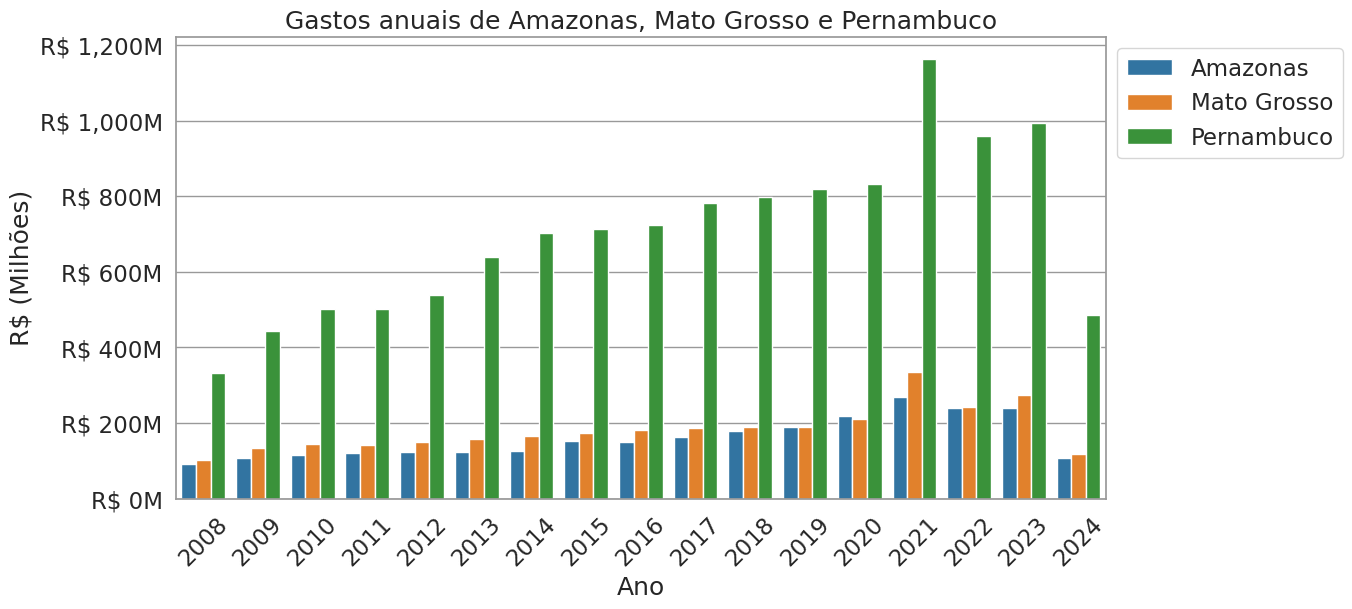

In [137]:
#plotando o grafico de gastos anuais dos estados Amazonas, Mato Grosso e Pernambuco
plt.figure(figsize=(12, 6))
sns.barplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf', palette='tab10')
plt.ylabel('R$ (Milhões)')
plt.xlabel('Ano')
plt.title('Gastos anuais de Amazonas, Mato Grosso e Pernambuco')
sns.set_context('notebook', font_scale=1.5)
sns.set_style('whitegrid', {'axes.edgecolor': '.6', 'grid.color': '.6'})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()

/tmp/ipykernel_21689/3827102704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', col='uf', kind='bar', palette='tab10')


<Figure size 1200x600 with 0 Axes>

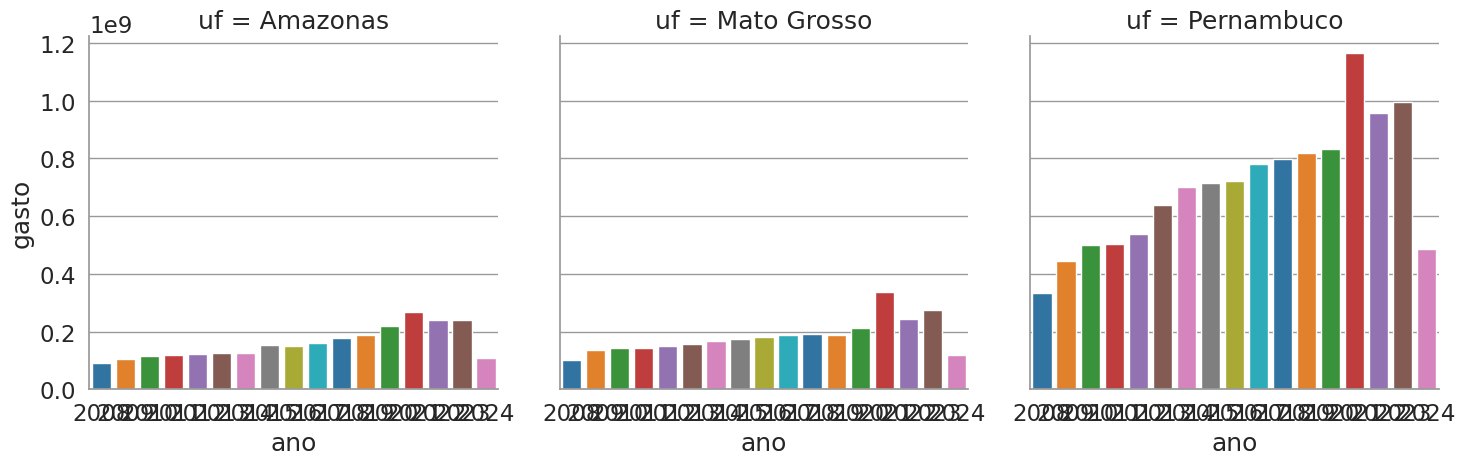

In [138]:
plt.figure(figsize=(12, 6))
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', col='uf', kind='bar', palette='tab10')

plt.show()


In [172]:
estados_selecionados = ['Amazonas', 'Mato Grosso', 'Pernambuco', 'Bahia']
estados_selecionados_ano = mensal_aberto.query('uf in @estados_selecionados').groupby(['uf', 'ano']).sum(['gasto', 'gasto_diario']).reset_index()
estados_selecionados_ano.head()

,uf,ano,gasto,mes,gasto_diario
0,Amazonas,2008,"91.277.492,92",77,"3.007.437,03"
1,Amazonas,2009,"106.491.315,75",78,"3.502.265,33"
2,Amazonas,2010,"114.175.777,25",78,"3.753.337,90"
3,Amazonas,2011,"120.263.314,00",78,"3.956.349,31"
4,Amazonas,2012,"122.916.860,05",78,"4.039.828,12"


/tmp/ipykernel_21689/2406799695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estados_selecionados_ano.query('uf == "Amazonas"'), x='ano', y='gasto_diario', ax=ax[0, 0], palette='viridis')
/tmp/ipykernel_21689/2406799695.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_21689/2406799695.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estados_selecionados_ano.query('uf == "Mato Grosso"'), x='ano', y='gasto_diario', ax=ax[0, 1], palette='viridis')
/tmp/ipykernel_21689/2406799695.py:21: UserWarning: set_tic

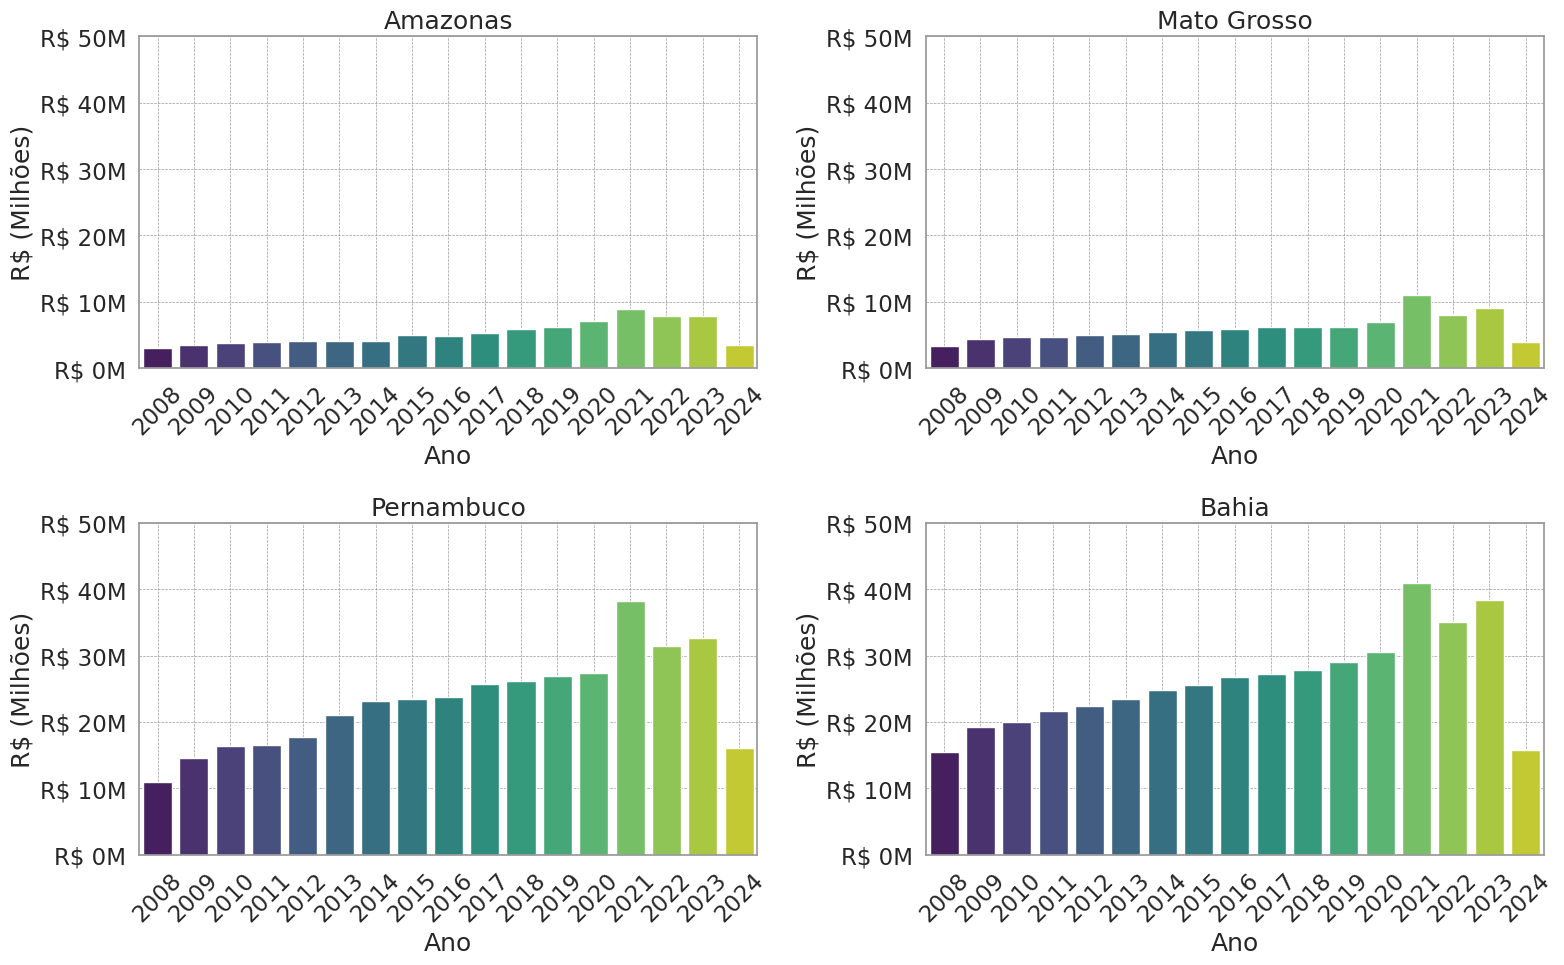

In [176]:
#usando subplots para plotar os graficos de gastos anuais dos estados Amazonas, Mato Grosso ,Pernambuco e Bahia
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

sns.barplot(data=estados_selecionados_ano.query('uf == "Amazonas"'), x='ano', y='gasto_diario', ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Amazonas')
ax[0, 0].set_ylabel('R$ (Milhões)')
ax[0, 0].set_xlabel('Ano')
ax[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
ax[0, 0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0, 0].grid(linestyle='--', linewidth=0.5)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0,0].set_ylim(0, 50000000)

sns.barplot(data=estados_selecionados_ano.query('uf == "Mato Grosso"'), x='ano', y='gasto_diario', ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Mato Grosso')
ax[0, 1].set_ylabel('R$ (Milhões)')
ax[0, 1].set_xlabel('Ano')
ax[0, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
ax[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0, 1].grid(linestyle='--', linewidth=0.5)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0,1].set_ylim(0, 50000000)

sns.barplot(data=estados_selecionados_ano.query('uf == "Pernambuco"'), x='ano', y='gasto_diario', ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Pernambuco')
ax[1, 0].set_ylabel('R$ (Milhões)')
ax[1, 0].set_xlabel('Ano')
ax[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
ax[1, 0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1, 0].grid(linestyle='--', linewidth=0.5)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1,0].set_ylim(0, 50000000)

sns.barplot(data=estados_selecionados_ano.query('uf == "Bahia"'), x='ano', y='gasto_diario', ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('Bahia')
ax[1, 1].set_ylabel('R$ (Milhões)')
ax[1, 1].set_xlabel('Ano')
ax[1, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000:,.0f}M'))
ax[1, 1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1, 1].grid(linestyle='--', linewidth=0.5)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1,1].set_ylim(0, 50000000)

plt.tight_layout()
plt.show()

